k 169
99878
99879


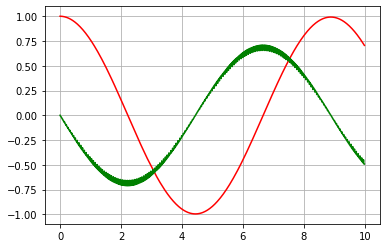

99878
time 0.29938220977783203
time 0.5086352825164795


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
import time
from __future__ import division
%matplotlib inline


def Euler(t,y,y1,yy,a,del_t):
    for i in range(len(t))[1:]:
        yy[i] = yy[i-1]+(del_t)*(yy[i-1]*y1[i]-y[i-1]*np.cos(a*t[i])**2)
        y[i] = y[i-1]+del_t*yy[i-1]
    return (y,yy)

def approx_inf_sym(func,bound_func,bound):
    x=0
    for i in range(len(func)):
        if func[i] > bound:
            func[i] = func[i-1]
        if func[i] < -bound:
            x = i
            break
        bound_func[i] = func[i]
    for i in range(x):
        bound_func[x+i+1] = -bound_func[x-i]
    return bound_func

def pop_zeros(items):
    while items[-1] == 0:
        items.pop()


        
t0 = time.time()# intial time
bound = 50# bound of asymptotic function
del_t = 10e-5  #size of integration steps
t = np.arange(0,10,del_t)
y = [0 for i in range(len(t))];y1 = [0 for i in range(len(t))]; yy = [0 for i in range(len(t))];
y_ub = [0 for i in range(len(t))];
a = 100 #frequency of oscillation
y[0] = 1
diff_eq = (np.cos(a*t))/(1+np.cos(a*t))
bounded = approx_inf_sym(diff_eq,y1,bound)
pop_zeros(bounded)
k = math.floor(len(t)/len(bounded))
print('k',k)
t0 = time.time()# intial time
bounded = bounded*int(k)
t2 = np.arange(0,del_t*(len(bounded)-1),del_t)
y = y[:len(t2)]
yy = yy[:len(t2)]
print(len(t2))
print(len(bounded))
sol,slope = Euler(t2,y,bounded,yy,a,del_t)

# unbound_sol = Euler(t,y_ub,diff_eq,del_t)

# t1 = time.time() #  time
# fig = plt.figure()
# ax = fig.gca()
# plt.plot(t2,bounded)
# plt.grid()
# plt.show()
t1 = time.time()# intial time

fig = plt.figure()
ax = fig.gca()
plt.plot(t2,sol,'r')
plt.plot(t2,slope,'g')
plt.grid()
plt.show()
t3 = time.time()# intial time

print(len(t2))
print('time', t1-t0)
print('time', t3-t0)